In [4]:
%matplotlib inline
#ESC + Z para recuperar celdas borradas!!!

In [3]:
import fitz  # Esta es la librería pymupdf que habéis instalado
import re
import pandas as pd
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'fitz'

In [3]:
def LeerFicherosPDF(ruta):
    ficheros = []
    contenido = os.listdir(ruta)
    for fichero in contenido:
        if os.path.isfile(os.path.join(ruta, fichero)) and fichero.endswith('.pdf'):
            ficheros.append(fichero)
    return ficheros

str

In [ ]:
def LeerDocumento(nombreFichero):
    with fitz.open(nombreFichero) as doc:
        text=""
        for page in doc:
            text = text + page.get_text()
    return text.split('\n')

In [ ]:
def BuscarValor(textoBuscar, lines):
    Encontrados = []

    valores = [1 if re.search(textoBuscar, line) else 0 for line in lines]
    valores = [i for i, s in enumerate(valores) if s==1 in valores]

    posiciones = len(textoBuscar)
    
    for i in valores:
        Encontrados.append(lines[i][lines[i].rfind(textoBuscar)+posiciones:].strip())

    return Encontrados

In [ ]:
import imageio as iio

def GenerarImagen(ruta, fichero):
    i = 0   
    zoom = 4
    mat = fitz.Matrix(zoom, zoom)
    with fitz.open(os.path.join(ruta,fichero)) as doc:
        for page in doc:
            i+=1
            val = f"image_{i+1}.png"
            pix = page.get_pixmap(matrix=mat)
            pix.save(os.path.join(ruta,fichero + "_" + val))
            #plt.figure(figsize=(8,15))
            #img = iio.imread(val)
            #plt.imshow(img, cmap='gray')
            #plt.show()

In [ ]:
chip_Data = [] #carpeta
paciente_Data = [] #carpeta
fecha_Data = []
NHC_Data = []
Nbiopsia_Data = []
biopsia_Data = []
texto_Data = []
mutaciones_Data = []
frecuencia_Data = []
NM_Data = []
espe_Data = []
farmaco_Data = []
ensayo_Data = []
BM_Data = []
Ndiagnostico_Data = []

Ruta = "C:\Lucia"

ficheros = LeerFicherosPDF(Ruta)

for ficheroPDF in ficheros:
    #print(os.path.join(Ruta,ficheroPDF))
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))

    #print(lines)

    NHC_Data.append(BuscarValor("NHC:", lines))
    Nbiopsia_Data.append(BuscarValor("biopsia:", lines))
    fecha_Data.append(BuscarValor("Fecha:", lines))
    texto_Data.append(BuscarValor("de la muestra:", lines))
    frecuencia_Data.append(BuscarValor("alelo:", lines))
    ensayo_Data.append(BuscarValor("NCT", lines))
    mutaciones_Data.append(BuscarValor("likely", lines)) #No FUNCIONA
    NM_Data.append(BuscarValor("likely", lines)) #Número mutaciones FALTA POR DETERMINAR
    mutaciones_Data.append(BuscarValor("likely", lines)) #Tipo mutación específico EXTRA 
    farmaco_Data.append(BuscarValor("likely", lines)) #Fármaco aprobado FALTA POR DETERMINAR
    BM_Data.append(BuscarValor("likely", lines)) #Beligno maligno EXTRA
    Ndiagnostico_Data.append(BuscarValor("likely", lines)) #FALTA POR DETERMINAR

    GenerarImagen(Ruta,ficheroPDF)




In [ ]:

Tabla1Pacientes = pd.DataFrame({'NHC': NHC_Data, 'Nº biopsia': Nbiopsia_Data})
print(Tabla1Pacientes)

CÓDIGO PYTHON DEFINITIVO

In [5]:
chip_Data = [] #carpeta
paciente_Data = [] #carpeta
fecha_Data = []
NHC_Data = []
Nbiopsia_Data = []
biopsia_Data = []
texto_Data = []
mutaciones_Data = []
frecuencia_Data = []
NM_Data = []
espe_Data = []
farmaco_Data = []
ensayo_Data = []
BM_Data = []
Ndiagnostico_Data = []

with fitz.open("Sample_3_v88.pdf") as doc:
    text = ""
    for page in doc:
        text = text + page.get_text()

NameError: name 'fitz' is not defined

In [6]:
lines = text.split('\n')
print(lines)
type(lines)

NameError: name 'text' is not defined

In [5]:
lines[1]

In [6]:
# NHC
NHC = [1 if re.search('NHC:', line) else 0 for line in lines]
NHC = [i for i, s in enumerate(NHC) if s==1 in NHC]

NHC_Data = []
#if NHC.len > 0:
    #NHC_Data.append(lines[0][lines[0].rfind('NHC')+4:].strip())
    
for i in NHC:
    NHC_Data.append(lines[i][lines[i].rfind('NHC')+4:].strip())
print(NHC_Data)

NHC

['Servicio de Anatomía Patológica', 'Laboratorio de Patología Molecular', 'Tel. 947 256 533 ext. 35517', 'Datos paciente: NHC: ', 'Nº biopsia: ', 'Fecha: 16-sep-2022', '1 de 3', 'Tipo de cáncer de la muestra: Carcinoma pulmonar no microcítico', 'Resultados del informe', '1 Biomarcadores relevantes', '3 Tratamientos disponibles', '5 Ensayos clínicos', 'Biomarcadores relevantes', 'Nivel', 'Alteración genómica', 'Tratamientos relevantes', '(En este tipo de cáncer)', 'Tratamientos relevantes', '(En otro tipo de cáncer)', 'Ensayos', 'clínicos', 'IIC', 'BRAF p.(N581S) c.1742A>G', 'B-Raf proto-oncogene, serine/threonine kinase', 'Frecuencia de alelo: 36.65%', 'Ninguno', 'dabrafenib', 'ipilimumab + nivolumab', 'vemurafenib', '5', 'Fuentes de datos públicos incluidas en tratamientos pertinentes:\xa0FDA1, NCCN, EMA2, ESMO', 'Gen', 'Cambio de', 'aminoácidos', 'Codificación', 'Exón', 'Frecuencia', 'de alelo', 'Locus', 'Transcripto', 'ID de la variante', 'Efecto de la', 'variante', 'ClinVar1', 'BRA

list

In [7]:
#Nº Biopsia
Nbiopsia = [1 if re.search('biopsia:', line) else 0 for line in lines]
Nbiopsia = [i for i, s in enumerate(Nbiopsia) if s==1 in Nbiopsia]

Nbiopsia_Data = []
biopsia_Data = [] #depende de la última letra del número de biopsia (B=BIOPSIA, C=CITOLOGIA, P=PUNCION)
for i in Nbiopsia:
    Nbiopsia_Data.append(lines[i][lines[i].rfind('biopsia')+11:].strip())
    #biopsia_Data.append(lines[i][lines[i].rfind('biopsia')+16:].strip())
print(Nbiopsia_Data)
#print(biopsia_Data)

Nbiopsia
#biopsia

'Laboratorio de Patología Molecular'

In [8]:
#Fecha
fecha = [1 if re.search('Fecha:', line) else 0 for line in lines]
fecha = [i for i, s in enumerate(fecha) if s==1 in fecha]

fecha_Data = []
for i in fecha:
    fecha_Data.append(lines[i][lines[i].rfind('Fecha')+7:].strip())
    #print(lines[i][lines[i].rfind('Fecha')+7:].strip())
print(fecha_Data)

fecha

'Datos paciente: NHC: '

In [9]:
#Diagnóstico
textoDiag = [1 if re.search('de la muestra:', line) else 0 for line in lines]
textoDiag = [i for i, s in enumerate(textoDiag) if s==1 in textoDiag]

textoDiag_Data = []
for i in textoDiag:
    textoDiag_Data.append(lines[i][lines[i].rfind('de la muestra:')+14:].strip())
    #print(lines[i][lines[i].rfind('muestra')+9:])
print(textoDiag_Data)

textoDiag

AttributeError: 'list' object has no attribute 'len'

In [10]:
#Frecuencia alélica NO QUIERO EL % AL IMPRIMIR EL VALOR!!!!!
frecuencia = [1 if re.search('alelo:', line) else 0 for line in lines]
frecuencia = [i for i, s in enumerate(frecuencia) if s==1 in frecuencia]

frecuencia_Data = []
for i in frecuencia:
    frecuencia_Data.append(lines[i][lines[i].rfind('alelo')+7:].strip())
    #print(lines[i][lines[i].rfind('alelo')+7:].strip())
print(frecuencia_Data)

frecuencia


['', '', '']


[4, 126, 211]

In [11]:
#Ensayos clínicos QUIERO TODO EL CONJUNTO, NO SOLO LA PRIMERA COLUMNA!!!!!
ensayo = [1 if re.search('NCT', line) else 0 for line in lines]
ensayo = [i for i, s in enumerate(ensayo) if s==1 in ensayo]

ensayo_Data = []
for i in ensayo:
    ensayo_Data.append(lines[i][lines[i].rfind('NCT')+1:].strip())
    #print(lines[i][lines[i].rfind('de los ensayos clínicos')+30:].strip())
print(ensayo_Data)

ensayo

16-sep-2022
16-sep-2022
16-sep-2022


In [12]:
#Mutaciones NO FUNCIONA!
mutaciones = [1 if re.search('likely', line) else 0 for line in lines]
mutaciones = [i for i, s in enumerate(mutaciones) if s==1 in mutaciones]

mutaciones_Data = []
for i in mutaciones:
    mutaciones_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(mutaciones_Data)

mutaciones

Carcinoma pulmonar no microcítico


In [13]:
#Tipo mutación específico EXTRA 
mutaciones = [1 if re.search('likely', line) else 0 for line in lines]
mutaciones = [i for i, s in enumerate(mutaciones) if s==1 in mutaciones]

mutaciones_Data = []
for i in mutaciones:
    mutaciones_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(mutaciones_Data)

mutaciones

36.65%


In [14]:
#Fármaco aprobado FALTA POR DETERMINAR
farmaco = [1 if re.search('likely', line) else 0 for line in lines]
farmaco = [i for i, s in enumerate(farmaco) if s==1 in farmaco]

farmaco_Data = [] = []
for i in mutaciones:
    farmaco_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(farmaco_Data = [])

farmaco

In [ ]:
#Beligno maligno EXTRA
BM = [1 if re.search('likely', line) else 0 for line in lines]
BM = [i for i, s in enumerate(BM) if s==1 in BM]

BM_Data = []
for i in BM:
    BM_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(BM_Data)

BM

In [ ]:
#Número diagnóstico
Ndiagnostico = [1 if re.search('likely', line) else 0 for line in lines]
Ndiagnostico = [i for i, s in enumerate(Ndiagnostico) if s==1 in Ndiagnostico]

Ndiagnostico_Data = []
for i in Ndiagnostico:
    Ndiagnostico_Data.append(lines[i][lines[i].rfind()].strip())
print(Ndiagnostico_Data)

Ndiagnostico

In [ ]:
CÓDIGO ADICIONAL PARA CALCULAR TIEMPO DE EJECUCION

In [ ]:
# Ejecutamos comando %time para determinar el tiempo que tarda la función en ejecutarse. 
%time nombre_funcion_def()

CÓDIGO ADICIONAL QUE NOS IMPRIME EL PDF EN IMÁGENES

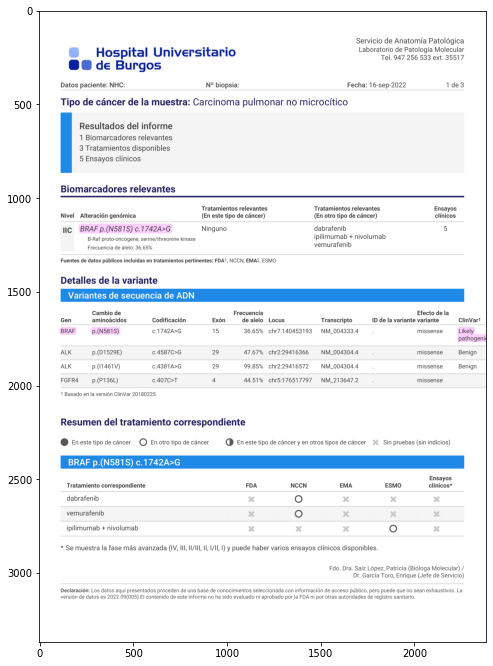

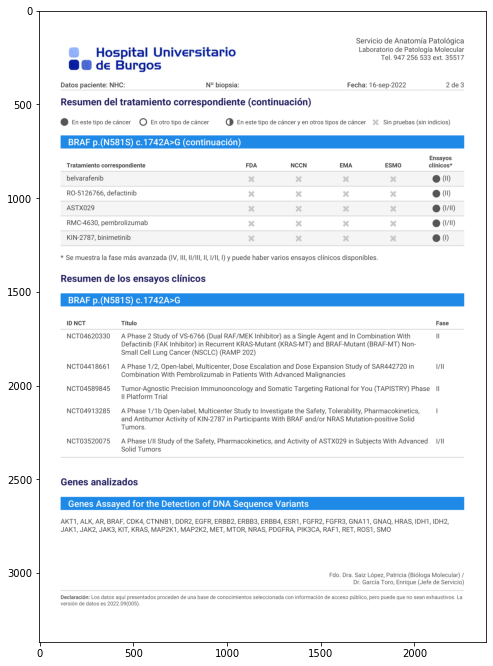

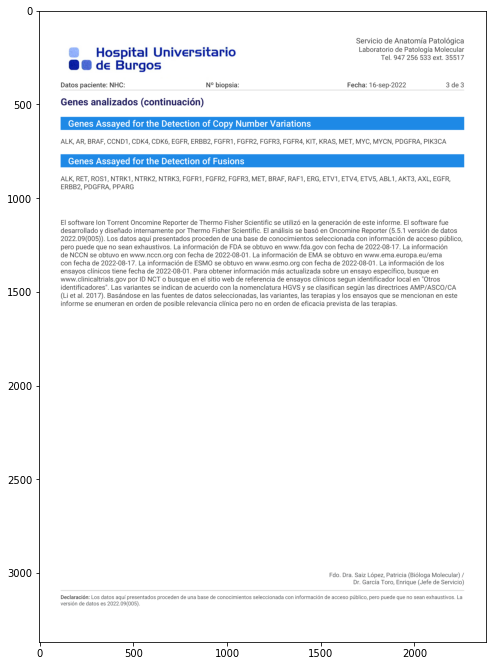

In [15]:
import imageio as iio

i = 0
zoom = 4
mat = fitz.Matrix(zoom, zoom)
with fitz.open("Sample_3_v88.pdf") as doc:
    text = ""
    for page in doc:
        i+=1
        val = f"image_{i+1}.png"
        pix = page.get_pixmap(matrix=mat)
        pix.save(val)
        plt.figure(figsize=(8,15))
        img = iio.imread(val)
        plt.imshow(img, cmap='gray')
        plt.show()

CREAMOS LOS DATAFRAMES NECESARIOS

In [16]:
Tabla1Pacientes = pd.DataFrame({'NHC': NHC_Data, 'Nº biopsia': Nbiopsia_Data})
print(Tabla1Pacientes)

ValueError: All arrays must be of the same length